In [1]:
import ctypes
import random
import numpy
import numpy as np
import pandas
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Fonctionnement du RBF

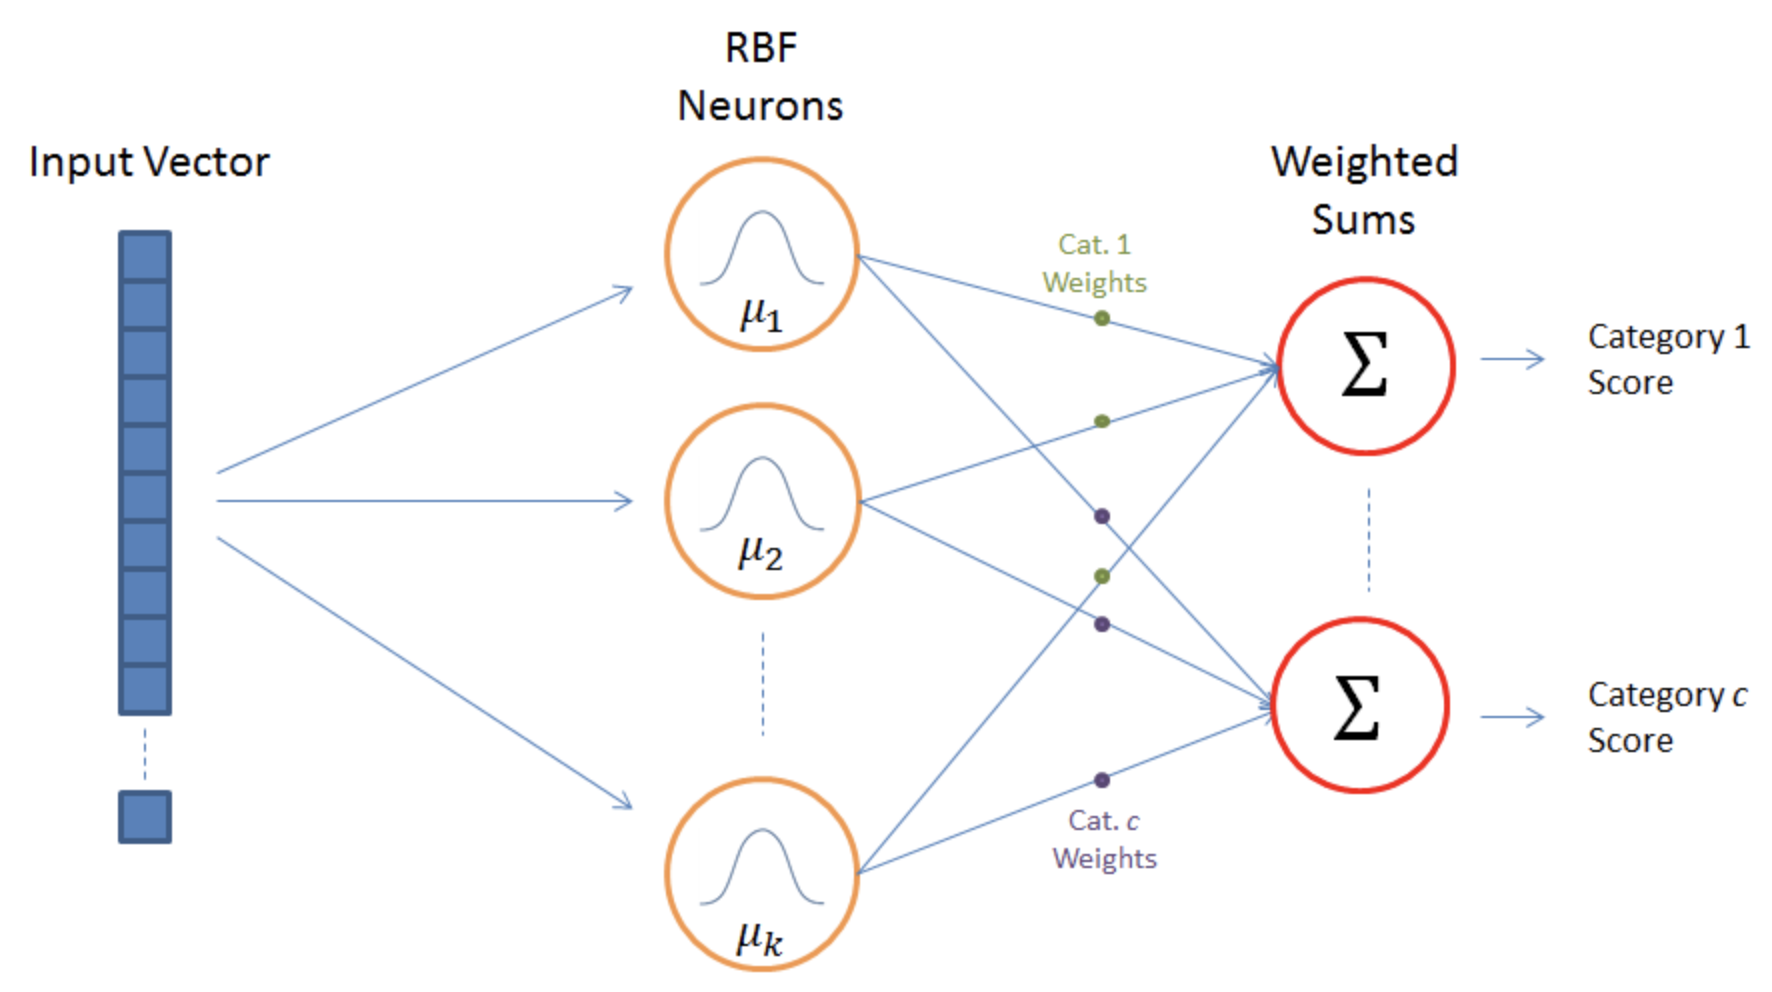

In [1]:
from IPython.display import Image
Image(filename='../pictures/RBF.png', width=500, height=20)

## Appel de la librairie c++

In [2]:
dll = ctypes.CDLL("libcpp2PA.dylib")

# Preparation des données d'entrainement

## Importation des données

In [3]:
# load and prépare dataset
dataset = numpy.genfromtxt("../dataset/Concrete_Data_Yeh.csv", delimiter=",",skip_header=1)
readData = pd.read_csv("../dataset/Concrete_Data_Yeh.csv", delimiter=",")
#readData.head()

## Preprocessing

In [4]:
#Input
X = dataset[:,0:8]

#Normalization of data
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(X)

# Run the normalizer on the dataframe
X = pd.DataFrame(x_scaled)

# View the dataframe
#X

In [5]:
#convert to Array 
X = X.reset_index().values

#Transforme to OneDimensions
X = X.ravel()
#X

In [6]:
#OutPut predict
result = dataset[:,8]
#result

In [7]:
#param[0] = alpha;
#param[1] = iterMax;
#param[2] = biais;
#param[3] = (Up) ? 3 : 2; //nombre d'input
#param[4] = 0; // 0: pas de prétraitement / 1 : Standardisation / 2 : Normalisation
#param[5] = (Rosenblatt) ? 1 : 0;
#param[6] = count; // taille du tableau result
#param[7] = Couche.Length;
#param[8] = (Classification) ? 1 : 0;
param = [0.01,
        1000,
        0.2,
        8,
        0,
        0,
        result.size,
        3,
        0,
        1,
        2]

In [8]:
center = param[10];

In [9]:
#Cast list to ctypes.c_xxx
X = (ctypes.c_double * len(X))(*X)
result = (ctypes.c_double * len(result))(*result)
param = (ctypes.c_double * len(param))(*param)

# creation

In [10]:
#Creation function initializer W
#public static extern unsafe double*** createMlpModel(int[] couche, int width);
cfuncTypecreateModelRBF = ctypes.CFUNCTYPE(ctypes.POINTER(ctypes.c_double),
                                            ctypes.c_int32)

#Call function createLinearModel
funcRBF = cfuncTypecreateModelRBF(("createRbfModel",dll))

In [11]:
Wp = funcRBF(center);

# Entrainement du modèle

In [12]:
#train model
#
cfunctionTypeTrainModelRBF = ctypes.CFUNCTYPE(ctypes.POINTER(ctypes.c_double),
                                              ctypes.POINTER(ctypes.c_double),
                                              ctypes.c_double * len(X),
                                               ctypes.c_double * len(result),
                                               ctypes.c_double * len(param))

#Call function createLinearModel
#void trainNaiveRbfModel(double *w, double input[], double result[], double param[])
funcTrainRBF = cfunctionTypeTrainModelRBF(("trainRbfModel",dll))

In [13]:
centers = funcTrainRBF(Wp, X, result, param)

# Test du modèle

In [14]:
test_predict = [1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176]

test_predict = (ctypes.c_double * len(test_predict))(*test_predict)

In [15]:
#Call predict function DLL
cfunctionTypePredictModelRBF = ctypes.CFUNCTYPE(ctypes.c_double,
                                                ctypes.POINTER(ctypes.c_double),
                                                ctypes.POINTER(ctypes.c_double),
                                                ctypes.c_double * len(test_predict),
                                                ctypes.c_double * len(param))

In [16]:
funcPredictRBF = cfunctionTypePredictModelRBF(("predictRbfModel",dll))

In [17]:
predict = funcPredictRBF(Wp, centers, test_predict,param)

In [18]:
print(predict)

nan
